In [1]:
import os
import random
import numpy as np
import torch
import glob
import time
import matplotlib.pyplot as plt
from torch.autograd import Variable
from utils.architectures.autoreg import SimpleClass
from utils.architectures.inceptionv4 import InceptionV4
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
# os.environ["CUDA_VISIBLE_DEVICES"]="0,1,2,3"

In [2]:
regressor = InceptionV4(num_classes=16)
regressor.cuda()
regressor.load_state_dict(torch.load("models/model15-22:04:35"))
a = regressor.eval()

In [3]:
# device = torch.device("cuda:2")

test_arr_complex = np.load("/mikQNAP/augmented_data/MRF_test/MRF_norm_volunteer12_7.npy")
test_arr = np.load("MRF_test_magnitude/MRF_norm_volunteer12_7.npy")
x = np.load("/mikQNAP/augmented_data/T1w_test/T1_norm_volunteer12_7.npy")
print(test_arr.shape)

test1 = test_arr.reshape(500,-1).T
test1 = Variable(torch.from_numpy(test1).type(torch.FloatTensor))
test1 = test1.cuda().view(-1,500,1)

T1_array = np.array([])
blocks = 4096
slice_len = int(np.ceil(test1.size()[0]/blocks))
for i in range(blocks):
    if i % (blocks//10) == 0:
        print(i)
    T1 = regressor(test1[i*slice_len:(i+1)*slice_len])
    T1 = T1.data.max(1)[1]
    T1 = T1.data.cpu().numpy()
    T1_array = np.concatenate((T1_array, T1.flatten()))

print("mean: ", np.mean(T1_array))

(500, 320, 320)
0


KeyboardInterrupt: 

In [9]:
test_arr_complex = test_arr_complex[0:500] + 1j* test_arr_complex[500:1000]

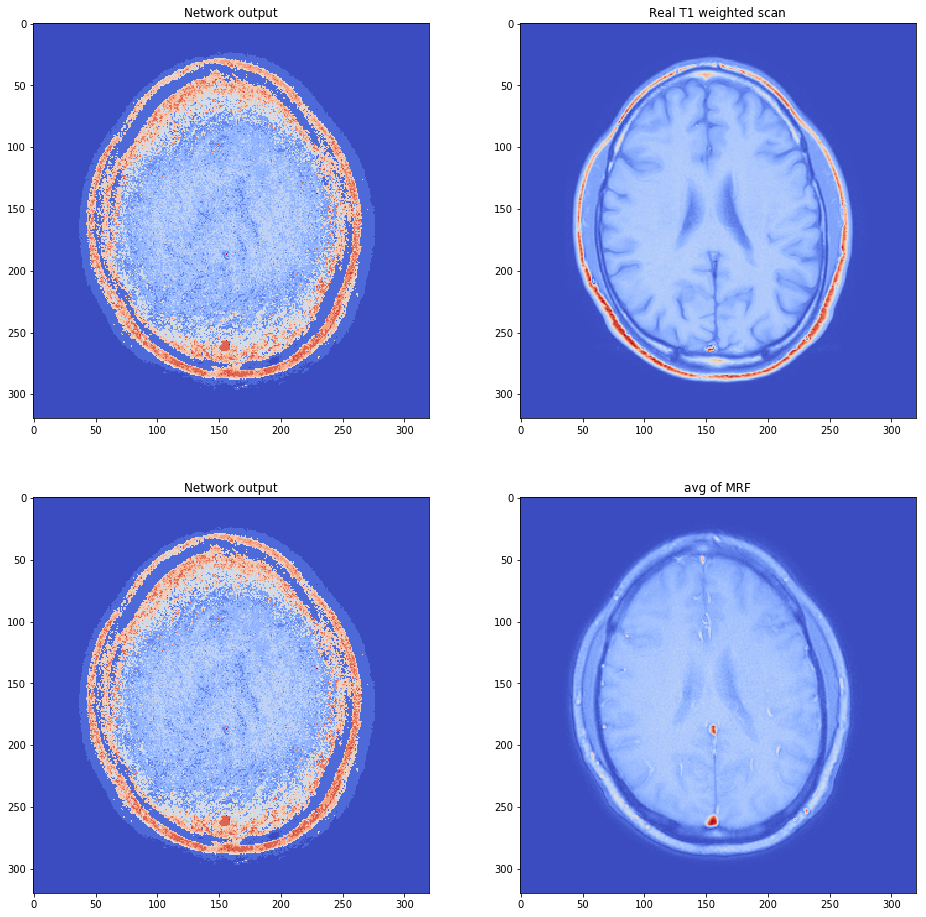

In [10]:
fig = plt.figure(figsize=(16,16))

plt.subplot(2, 2, 1)
plt.title("Network output")
plt.imshow(T1_array.reshape(320,320), cmap="coolwarm")

plt.subplot(2, 2, 2)
plt.title("Real T1 weighted scan")
plt.imshow(x[0], cmap="coolwarm")

plt.subplot(2, 2, 3)
plt.title("Network output")
plt.imshow(T1_array.reshape(320,320), cmap="coolwarm")

plt.subplot(2, 2, 4)
plt.title("avg of MRF")
plt.imshow(np.abs(np.mean(test_arr_complex, 0)), cmap="coolwarm")

plt.show()

In [4]:
test_arr_complex = np.load("/mikQNAP/augmented_data/MRF/MRF_norm_volunteer1_1.npy")
test_arr = np.load("MRF_magnitude/MRF_norm_volunteer1_1.npy")
x = np.load("/mikQNAP/augmented_data/T1w/T1_norm_volunteer1_1.npy")
print(test_arr.shape)

test1 = test_arr.reshape(500,-1).T
test1 = Variable(torch.from_numpy(test1).type(torch.FloatTensor))
test1 = test1.cuda().view(-1,500,1)

T1_array = np.array([])
blocks = 4096
slice_len = int(np.ceil(test1.size()[0]/blocks))
for i in range(blocks):
    if i % (blocks//10) == 0:
        print(i)
    T1 = regressor(test1[i*slice_len:(i+1)*slice_len])
    T1 = T1.data.max(1)[1]
    T1 = T1.data.cpu().numpy()
    T1_array = np.concatenate((T1_array, T1.flatten()))

print("mean: ", np.mean(T1_array))

(500, 320, 320)
0
409
818
1227
1636
2045
2454
2863
3272
3681
4090
mean:  2.442158203125


In [5]:
test_arr_complex = test_arr_complex[0:500] + 1j* test_arr_complex[500:1000]

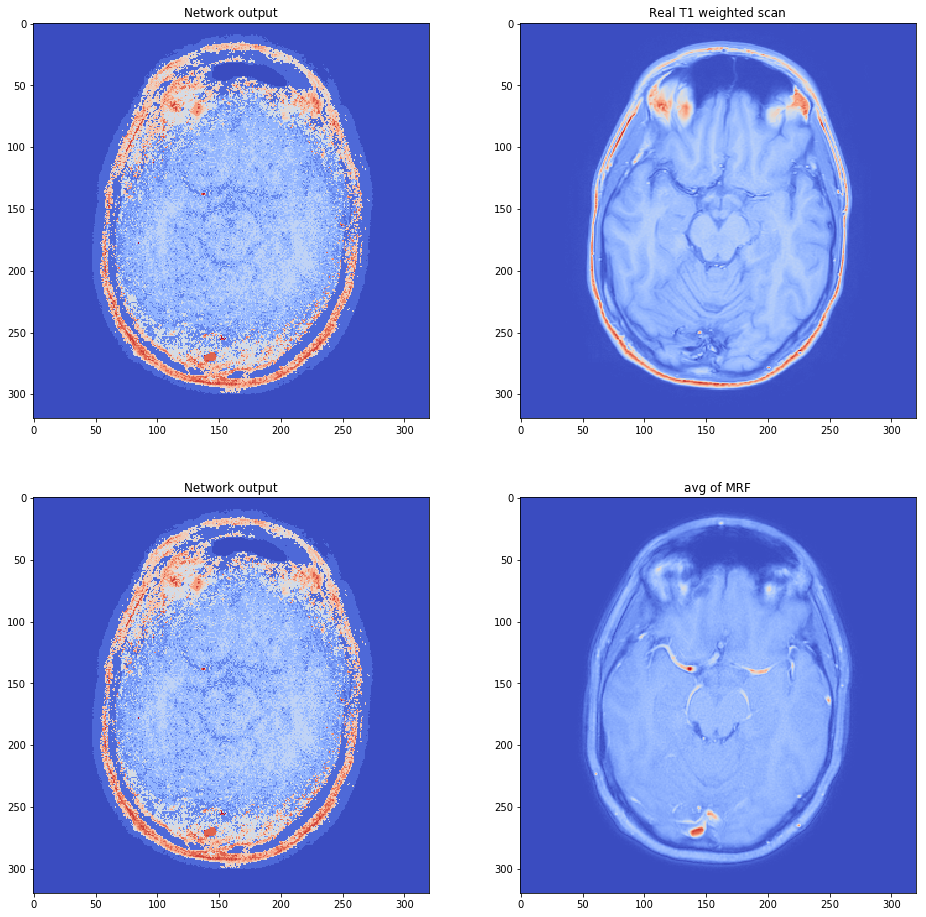

In [6]:
fig = plt.figure(figsize=(16,16))

plt.subplot(2, 2, 1)
plt.title("Network output")
plt.imshow(T1_array.reshape(320,320), cmap="coolwarm")

plt.subplot(2, 2, 2)
plt.title("Real T1 weighted scan")
plt.imshow(x[0], cmap="coolwarm")

plt.subplot(2, 2, 3)
plt.title("Network output")
plt.imshow(T1_array.reshape(320,320), cmap="coolwarm")

plt.subplot(2, 2, 4)
plt.title("avg of MRF")
plt.imshow(np.abs(np.mean(test_arr_complex, 0)), cmap="coolwarm")

plt.show()